# Práctica 2: Aprendizaje automático

__Fecha de entrega: 27 de marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 1__

__Nombres de los estudiantes: Fernando Isaías Leal Sánchez y Jinqing Cai__

In [3]:
RANDOM_STATE = 42

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---

> En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene dolor lumbar o no.
> 
> Las variables del conjunto de datos son las siguientes: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis, pelvic_slope, Direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope.
> 
> Crea un dataframe a partir del fichero `lower_back_pain_dataset2.csv` que se proporciona junto con la práctica.

In [ ]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('lower_back_pain_dataset2.csv', index_col = 0)
df

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
pelvic_incidence,,,,,,,,,,,,
63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal


## 2) Análisis de los datos

> Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

<AxesSubplot:>

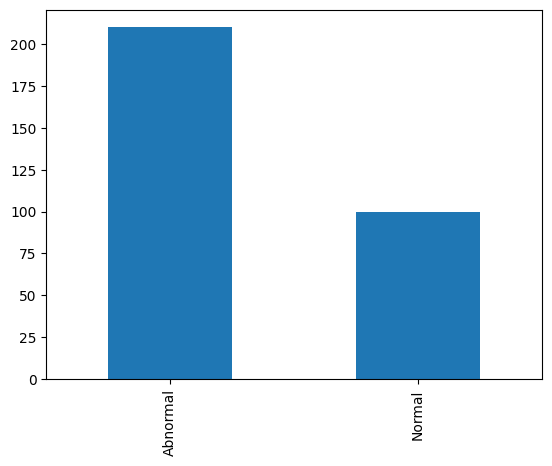

In [5]:
df['Class_att'].value_counts().plot(kind='bar')

Como podemos observar, teniendo en cuenta la clasificación por `Class_att`, los datos con `Abnormal` son alrededor del doble de los casos con `Normal`. Esto puede ser un problema si queremos usar estos datos para resolver un problema de clasificación, ya que una de las clases tendrá mayor representación que la otra, lo cual puede llevar a que de respuestas sesgadas.

Una de las posibles soluciones ante este problema es reducir artificialmente la clase con demasiada representación, quitando casos que pertenezcan a ella aleatoriamente, o produciendo casos artificales aleatoriamente de la clase con menor representación.

> Calcula la correlación de las variables con la variable `Class_att`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Como queremos calcular la correlación con una variable categórica, hay que convertirlo en numérico antes. En este caso, es de tipo binario, por lo que basta con hacer que `Abnormal` sea 1, y `Normal` 0.

In [9]:
def corr_class_att(df: pd.DataFrame) -> pd.DataFrame:
    df2 = df.copy()
    df2['Class_att'] = df2['Class_att'] == 'Abnormal'
    return pd.DataFrame(df2.corr().loc[:,'Class_att'][:-1])
corr_class_att(df)

,Class_att
pelvic_tilt,0.326063
lumbar_lordosis_angle,0.312484
sacral_slope,0.210602
pelvic_radius,-0.309857
degree_spondylolisthesis,0.443687
pelvic_slope,0.055865
Direct_tilt,-0.039591
thoracic_slope,-0.049354
cervical_tilt,0.100044
sacrum_angle,0.026887


Se puede observar que la variable numérica con mayor correlación con `Class_att` es `degree_spondylolisthesis`, con un valor de 0.44. Como hemos explicado en la parte 1 de la práctica, un valor de correlación cercano al 1 quiere decir que tiene una relación directa entre ambas variables. Es decir, cuando uno aumenta, el otro también, en proporción constante.

En este caso, podemos interpretar como que, cuando aumenta `degree_spondylolisthesis`, también aumenta `Class_att` (su versión binario). Es decir, cuando mayor sea `degree_spondylolisthesis`, más probabilidad de ser `abnormal` (1).

Por otra parte, `pelvic_radius` tiene una mayor correlación negativa con `Class_att`. Es decir, cuando menor sea su valor, más probabilidad de pertenecer a la clase `abnormal`.

> Comprueba los rangos y distribuciones de las variables numéricas con mayor correlación con la variable `Class_att`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir. ¿Hay pares de variables que separen bien las clases? 

Primero, obtenemos las distribuciones y los rangos de cada una de las variables

In [10]:
info = df.describe()
info.loc['range'] = info.loc['max'] - info.loc['min']
info # Ahora con el valor de rango

,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200
range,55.986812,111.742385,108.062635,92.988466,429.601261,0.995606,29.716900,12.286200,9.790480,42.259446,37.333300


Para sacar aquellas variables que nos dan mayor correlación, usamos la tabla que conseguimos antes para realizar un sesgo. Como una correlación negativa también indica una relación entre las variables (simplemente, una relación inversa), para decidir aquellas variables con mayor correlación con `Class_att` primero **tomamos el valor absoluto** y luego las ordenamos.

In [22]:
corrs = corr_class_att(df)
corrs['Class_att'] = corrs['Class_att'].map(abs)
corrs = corrs.sort_values("Class_att")
top_5_correlación = corrs.iloc[-5:]
classes_most_correlated = list(top_5_correlación.index)
top_5_correlación

,Class_att
sacral_slope,0.210602
pelvic_radius,0.309857
lumbar_lordosis_angle,0.312484
pelvic_tilt,0.326063
degree_spondylolisthesis,0.443687


Decidimos comparar las 5 clases con mayor correlación con `Class_att`. Para ello, hacemos un 

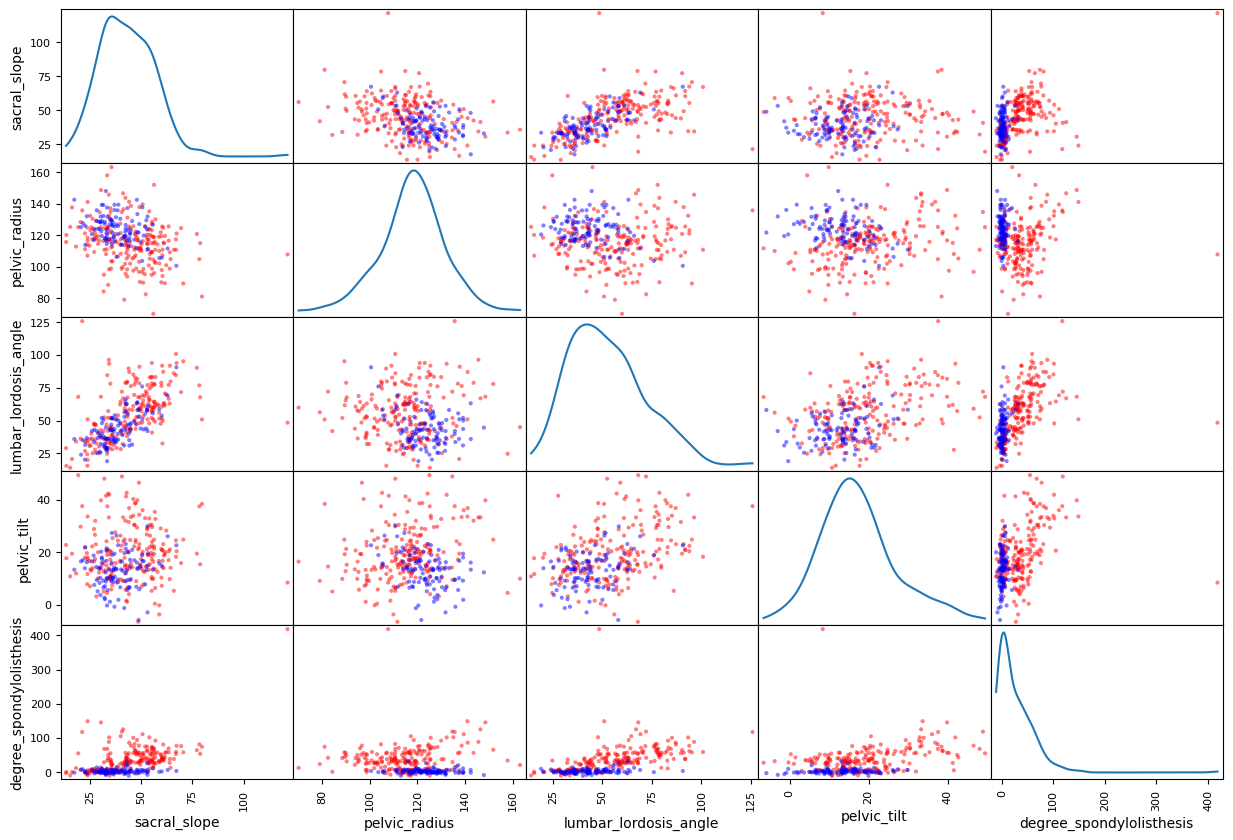

In [27]:
dict_colors = {'Abnormal': 'Red', 'Normal': 'Blue'}
color = df['Class_att'].map(dict_colors)
_ = pd.plotting.scatter_matrix(df[classes_most_correlated], diagonal='density', figsize=(15,10), color=color)

En general, observamos que no hay un par de variables que separen completamente los casos. Sin embargo, `degree_spondylolisthesis` (variable con mayor correlación con `Class_att`) parece que muestra una mayor concentración de los casos `Normal`. Es decir, todos los casos con `Class_att` `Normal` tienen un valor de `degree_spondylolithesis` bajo. Y eso nos puede ser útil para separar bien las clases.


> A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

Viendo simplemente el análisis anterior, parece que es un problema difícil de resolver. Sin embargo, el anterior análisis solo considera el uso de dos variables, mientras que nosotros disponemos de muchas más. Además, si que tenemos variables con cierta correlación con las etiquetas de `Class_att`, lo cual nos lleva a pensar que un algoritmo que tenga en cuenta a todas ellas tendría suficiente información para conseguir una buena clasificación.

## 3) Árboles de decisión

> Aplica árboles de decisión para resolver el problema


### 3.1) Normalización de los datos

> Decide razonadamente si es necesario escalar o estandarizar los datos.

**No es necesario estandarizar** los datos puesto que el algoritmo del árbol de decisión no se ve afectado por las diferentes escalas de cada dimensión. Al fin y al cabo, como se toma cada decisión en función de una única dimensión, la propia magnitud dentro de esa dimensión es menos relevante. Para cada nodo selecciona el atributo que mejor discrimine entre conjunto de muestras (genera mayor disminución de entropía, o ganancia de información).

Además, si no escalamos el árbol de decisión luego será más interpretable, pues no tendremos que deshacer la normalización para entender que decisiones está tomando.

### 3.2) Optimizando el número mínimo de ejemplos para dividir un nodo

> En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.
>
> Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes. 
>
> Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.
> 
> Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.
> 
> Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

Primero, separamos los datos del CSV en datos de entrenamiento (que llamaremos `X`) y variable a predecir (que llamaremos `y`)

In [6]:
from sklearn.tree import DecisionTreeClassifier
feature_names = list(set(df.columns) - set(['Class_att'])) # Nombres de las variables
label_values = ['Abnormal', 'Normal']                      # Las posibles etiquetas o clasificaciones de los datos
X = df[feature_names] # Los datos de las variables que usaremos para la predicción
y = df['Class_att']   # La clasificación de los casos anteriores

Dado un árbol de decisión de una profundidad dada, nos interesa saber su **precisión** en los casos de entrenamiento y casos de prueba. Para ello usaremos una validación cruzada en 10 partes, y consideraremos que la puntuación para una profundidad dada será la media de las puntuaciones en los casos de entrenamiento y los casos de prueba

In [70]:
from sklearn.model_selection import cross_validate
def score_with_cross_validation(clf):
    scores = cross_validate(clf, X, y, scoring='accuracy', 
                            cv=10, return_train_score=True)
    train_accuracy = np.mean(scores['train_score'])
    test_accuracy = np.mean(scores['test_score'])
    return pd.DataFrame({'train_score': [train_accuracy], 'test_score': [test_accuracy]})

Estudiamos las profundidades desde 1 hasta 11. Hemos elegido 11 puesto que observamos que con mayor profundidad los resultados del test no mejoran

In [73]:
depth_range  = range(1,12)
dt_classifiers  = {depth: DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=RANDOM_STATE) for depth in depth_range}
dt_scores    = {depth: score_with_cross_validation(clf) for depth, clf in dt_classifiers.items()}
dt_train_scores = [score.train_score for score in dt_scores.values()]
dt_test_scores  = [score.test_score for score in dt_scores.values()]

Una vez obtenemos los datos, procedemos a graficarlos

Text(0.5, 1.0, 'Test scores')

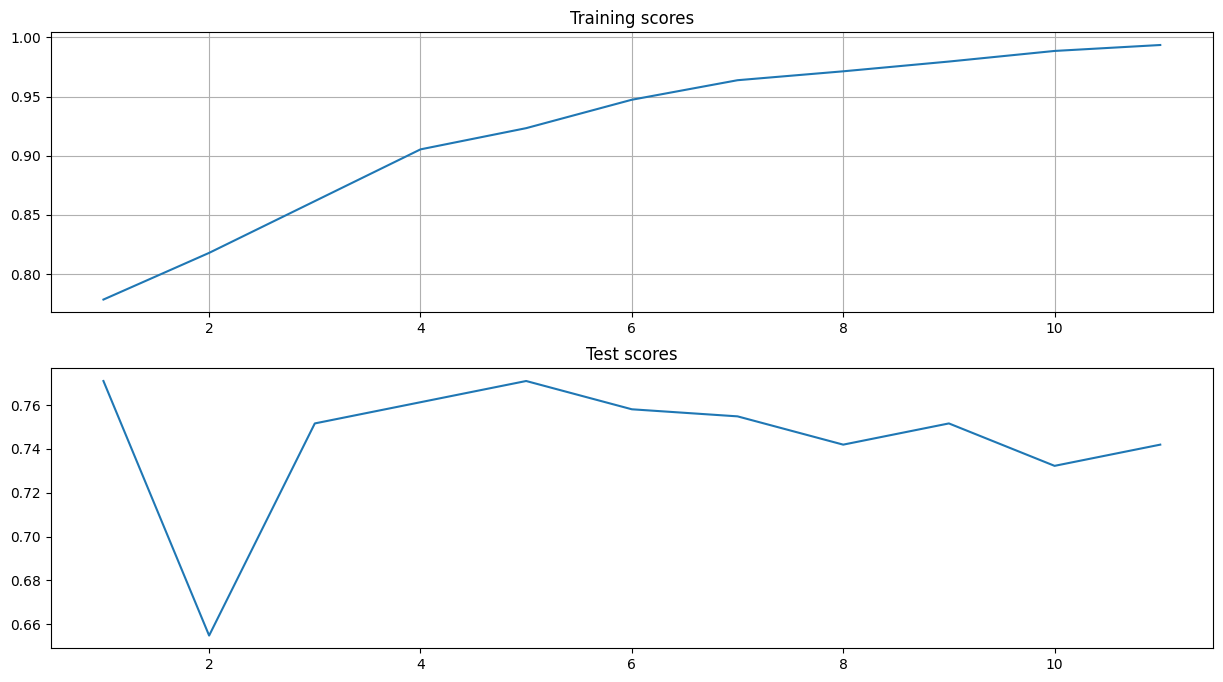

In [74]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(15,8))
ax1.plot(depth_range, dt_train_scores)
ax1.grid(True)
ax1.set_title('Training scores')
ax2.plot(depth_range, dt_test_scores)
ax2.set_title('Test scores')

In [76]:
dt_scores[4]

,train_score,test_score
0,0.905376,0.76129


Es muy probable que la razón por la que con profundidad igual a 1 alcanza un mayor Test Score sea el **desequilibrio** en muestras de las dos clases de la que hablabamos antes. Como hay tantas muestras `Abnormal`, si decimos que una muestra es de esa clase, tenemos una alta tasa de aciertos.

A partir de allí, podemos ver que se alcanza el máximo de Test Score con **profundidad igual al 5**, y luego empieza a decrecer. Esto da una indicación de que estaría bien pararse ya en ese nivel, sino podriamos estar sobreaprendiendo.

### 3.3) Analizando el árbol de decisión

> Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 
> 
> __Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

Una vez hemos decidido que la profundidad idea es `5`, procedemos a crear un árbol de decisión de profundidad máxima `5` usando todos los datos que tenemos.

In [96]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth= 5, random_state=RANDOM_STATE)
_ = dtc.fit(X, y)

In [97]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

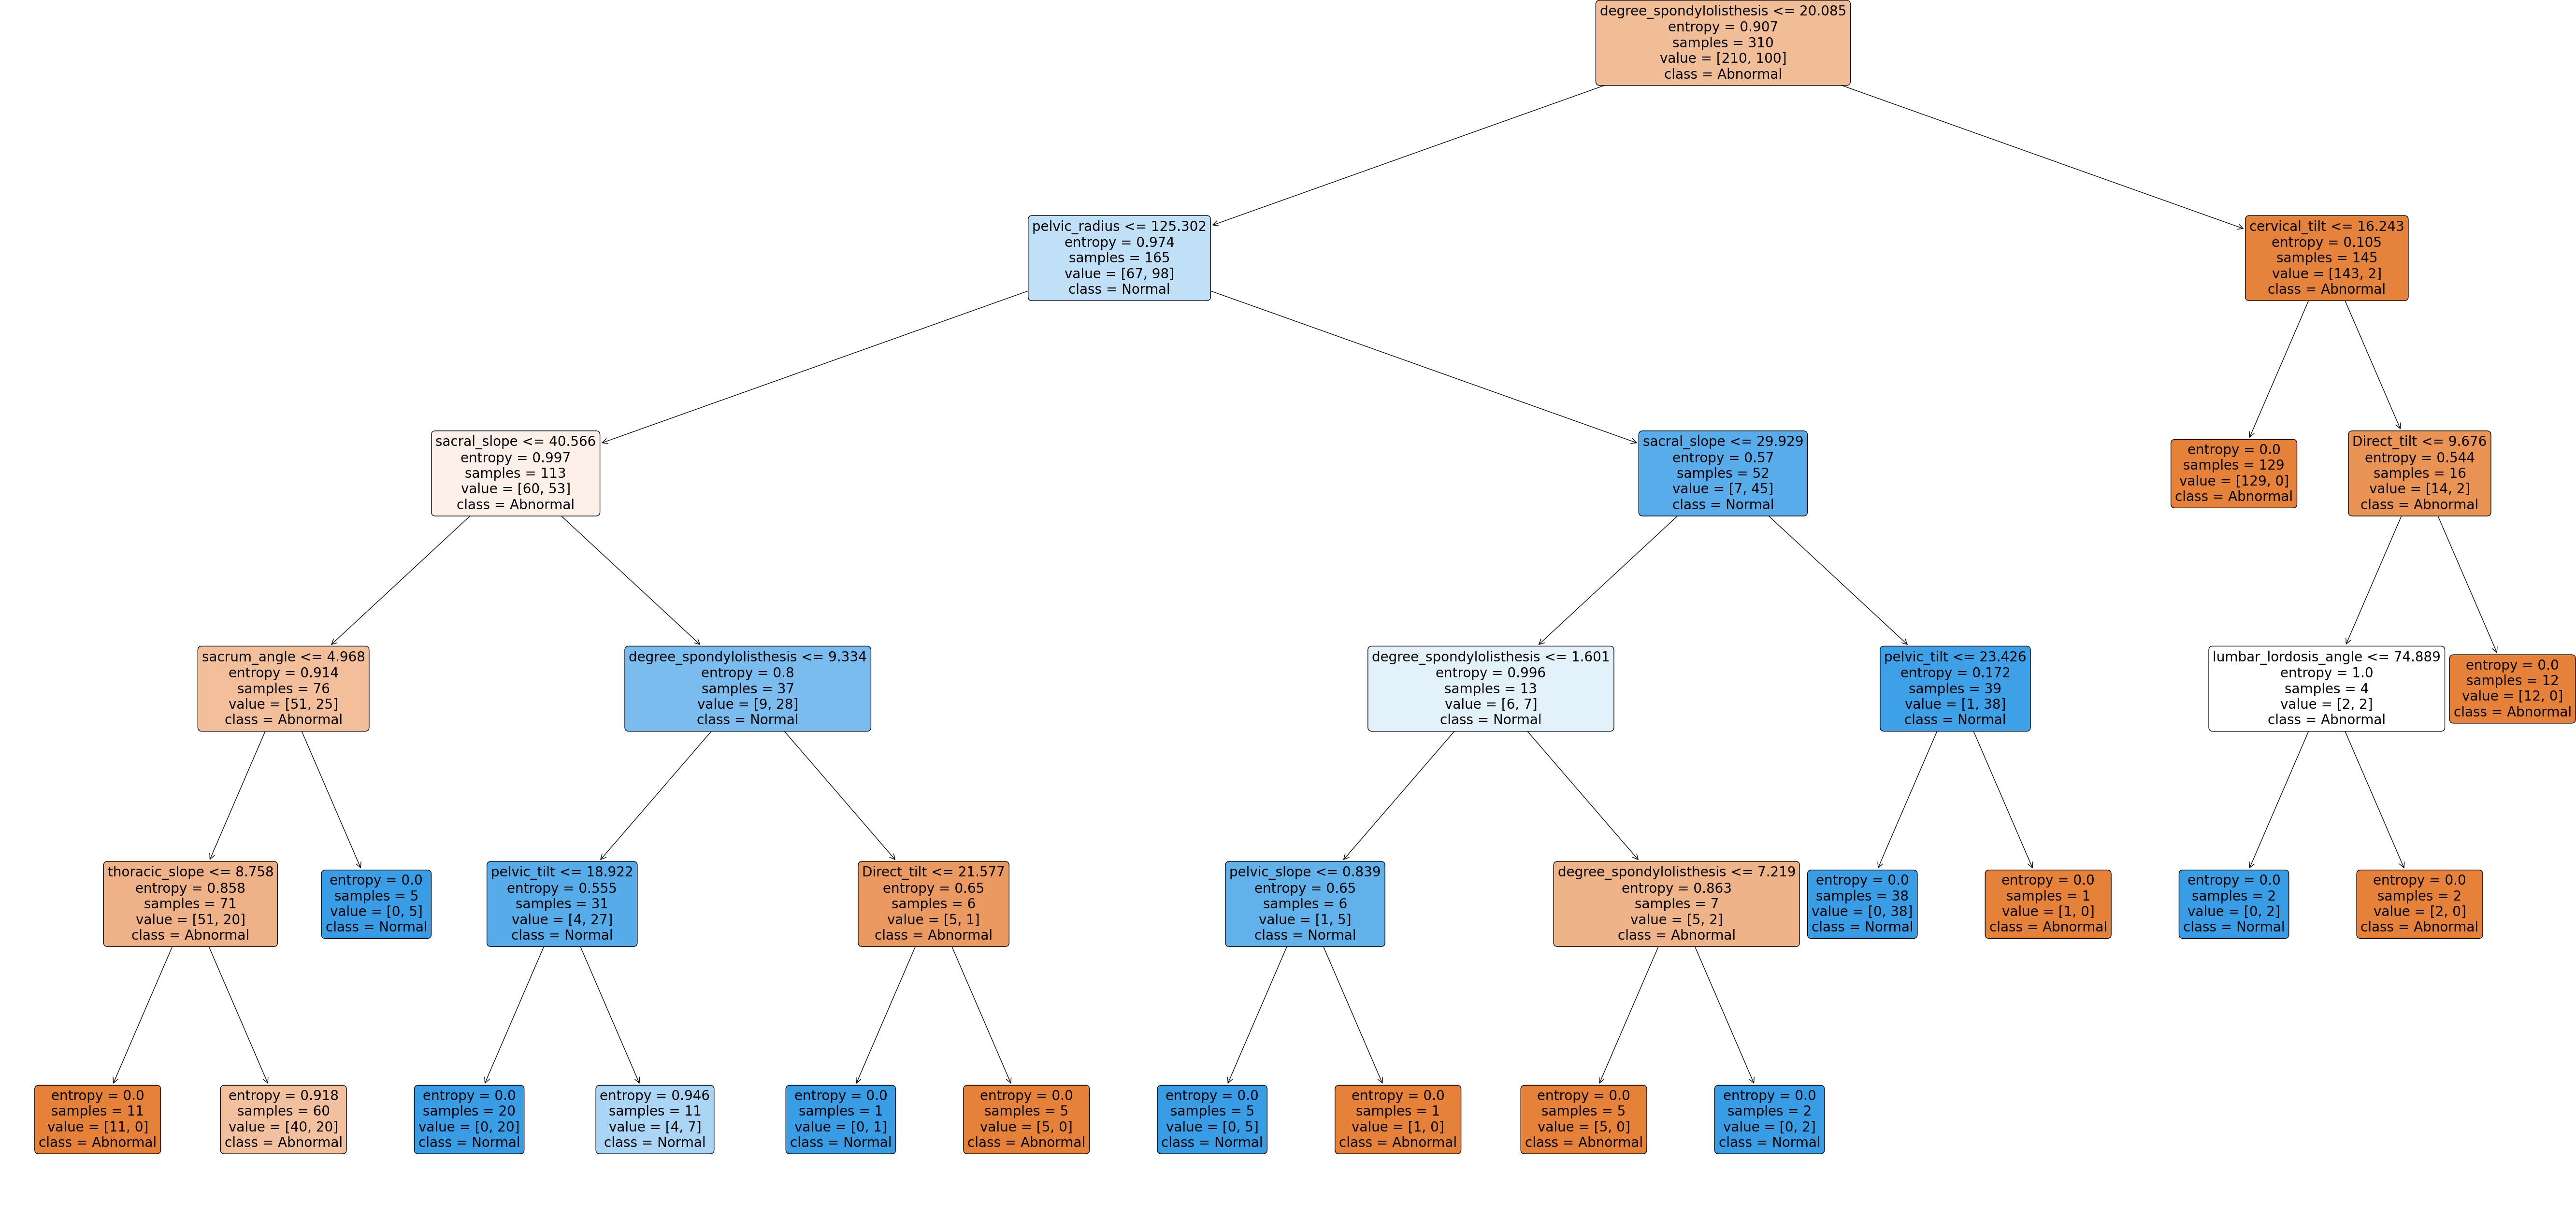

In [109]:
# Pintamos el árbol
plt.figure(figsize=(50,25))
_ = plot_tree(dtc, filled=True, feature_names=feature_names, class_names=label_values, rounded=True, fontsize=20)


> Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

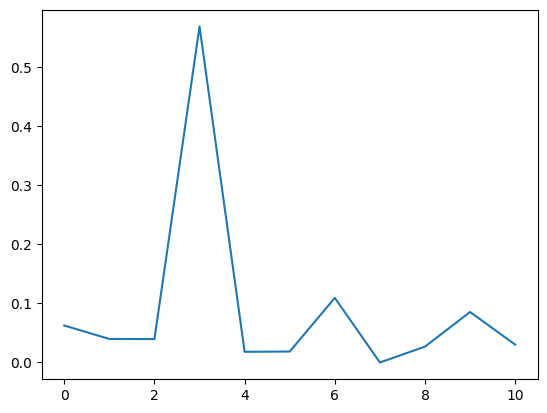

In [105]:
importancia_variables = dtc.feature_importances_
_ = plt.plot(range(len(importancia_variables)), importancia_variables)


> Con esos gráficos, contesta lo siguiente:
> 
> - ¿Cuáles son las variables más importantes y en qué orden? 

Observamos que las variables más importantes son la 3, la 6 y la 9 en ese orden. Podemos recuperar el nombre de estas variables usando `feature_names`. 

Se puede ver que son tres de las cinco variables con mayor correlación con `Class_att` que habíamos obtenido anteriormente.

In [106]:
[feature_names[3],feature_names[6],feature_names[9]]

['degree_spondylolisthesis', 'sacral_slope', 'pelvic_radius']


> - ¿Hay variables del conjunto de datos que no se han usado? 

In [108]:
[feature_names[7], importancia_variables[7]]

['scoliosis_slope', 0.0]

Como podemos observar, la importancia de la variable `scoliosis_slope` es `0`, por lo que no la hemos usado en nuestra clasificación

> - ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 

La primera pregunta que se hace en el nodo raíz es `degree_spondylolisthesis <= 20.085`

La tasa de aciertos se puede calcular con la fórmula

$$
\frac{VP + VN}{VP + VN + FP + FN}
$$

viendo nuestra gráfica del árbol de decisión, y considerando que "positivos" son todos los casos que clasificamos como `Abonormal`, vemos que 
 - Decimos que es `Normal` cuando es `Normal` un $\frac{98}{165}$ de las veces $\Longrightarrow VN = 98$
 - Decimos que es `Normal` cuando es `Abnormal` un $\frac{67}{165}$ de las veces $\Longrightarrow FN = 67$
 - Decimos que es `Abnormal` cuando es `Normal` un $\frac{2}{145}$ de las veces $\Longrightarrow FP = 2$
 - Decimos que es `Abnormal` cuando es `Abonormal` un $\frac{143}{145}$ de las veces $\Longrightarrow VP = 143$

Con estos datos podemos calcular la tasa de aciertos de nuestro clasificador

In [111]:
VN = 98
FN = 67
FP = 2
VP = 143
tasa_aciertos = (VP + VN)/(VP + VN + FP + FN)
tasa_aciertos

0.7774193548387097

En conclusión, nuestra tasa de aciertos es del $0.777419\dots$

> - ¿El árbol que has calculado es capaz de separar las clases? 

No, puesto que siempre hay algún $FN$ o $FP$ en alguna de las hojas (en la segunda hoja o en la cuarta).

> - Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?

Hemos mostrado el árbol completo, así que esta pregunta no aplica.

Pero calculando la cantidad de verdaderos positivos y verdaderos negativos (en nodos hojas), observamos que:

In [123]:
VP = 11 + 40 + 5 + 1 + 5 + 1 + 2 + 12 + 129
FP = 20
VN = 5 + 20 + 7 + 1 + 5 + 2 + 38 + 2
FN = 4

TVP = VP / (VP + FN)
TVN = VN / (VN + FP)
VPP = VP / (VP + FP)

print(TVP)
print(TVN)
print(VPP)

0.9809523809523809
0.8
0.911504424778761


Se puede ver que TVP (Tasa de Verdaderos Positivo) es más alto que TVN (Tasa de Verdaderos Negativos), lo cual quiere decir que clasifica mejor los positivos (Clase Abnormal) que negativo.

Esto puede deber a que había más muestras de clase abnormal que normal (el desequilibrio que comentábamos).

La variable que mejor ayuda a descriminar ha sido `degree_spondylolisthesis` y `cervical_tilt`. Con esas dos preguntas, ya conseguimos clasificar 129 muestras abnormales, que son más de la mitad de las muestras abnormales que tenemos (210).

> - ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

En el primero nodo del segundo nivel, aquel que a penas es de color naraja y tiene $60$ nodos de etiqueta `Normal` y $53$ nodos de etiqueta `Abnormal`, es el que muestra mayor nivel de confusión

## 3.4) Estudiando el error

> Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

In [117]:
precisión =     lambda VP, VN, FP, FN : VP / (VP + FP)
exhaustividad = lambda VP, VN, FP, FN : VP / (VP + FN)
medida_F1 =     lambda VP, VN, FP, FN : 2 * ((VPP := precisión(VP,VN,FP,FN)) * (TVP := exhaustividad(VP,VN,FP,FN))) / (VPP + TVP)

In [128]:
print(f"""
Precisión:     {precisión(VP, VN, FP, FN)}
Exhaustividad: {exhaustividad(VP, VN, FP, FN)}
Medida F1:     {medida_F1(VP, VN, FP, FN)}
"""[1:-1])

Precisión:     0.911504424778761
Exhaustividad: 0.9809523809523809
Medida F1:     0.944954128440367


> Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y,dtc.predict(X), target_names=label_values))

              precision    recall  f1-score   support

    Abnormal       0.91      0.98      0.94       210
      Normal       0.95      0.80      0.87       100

    accuracy                           0.92       310
   macro avg       0.93      0.89      0.91       310
weighted avg       0.92      0.92      0.92       310



Confusion matrix, without normalization
[[206   4]
 [ 20  80]]


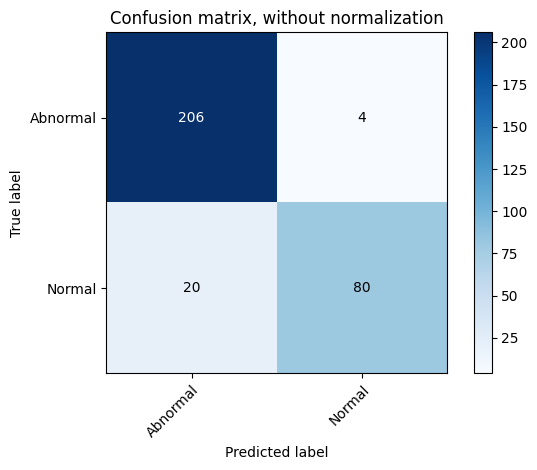

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
_ = plot_confusion_matrix(y, dtc.predict(X),classes=label_values)

> Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

Aunque no es 100% seguro, no es una mala clasificación que pueda ser usada como una medida heurística o como una primera opinión.

## 4) Resuelve el mismo problema usando un clasificador k-NN
> Busca el valor óptimo para el número de vecinos

Hacemos un estudio paralelo al que hicimos con árboles de decisión, usando validación cruzada en 10 partes para dar una puntuación a cada posible valor de `n`. Los valores de `n` van desde $1$, indicando que solo tomamos en cuenta el valor más cercano, hasta $310\times\frac{9}{10} = 279$, el número de datos que tendremos en cada validación cruzada.

In [222]:
def study_classifier(X, y, classifier_constructor, **kwargs): 
    from types import SimpleNamespace
    NS = SimpleNamespace()
    neigh_range = range(1, int(len(X)*0.9) + 1)
    NS.classifiers  = {n: classifier_constructor(n,**kwargs) for n in neigh_range}
    NS.scores       = {n: score_with_cross_validation(clf) for n, clf in NS.classifiers.items()}
    NS.train_scores = [score.train_score for score in NS.scores.values()]
    NS.test_scores  = [score.test_score  for score in NS.scores.values()]
    fig, (ax1, ax2) = plt.subplots(2,figsize=(15,8))

    # ax1.set_xticks(neigh_range)
    ax1.plot(neigh_range, NS.train_scores)
    ax1.plot(neigh_range, NS.test_scores, color='Red')
    ax1.set_title('Training scores')
    # ax2.set_xticks(neigh_range)
    ax2.plot(neigh_range, NS.test_scores)
    ax2.set_title('Test scores')
    plt.show()

    return NS

  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be el

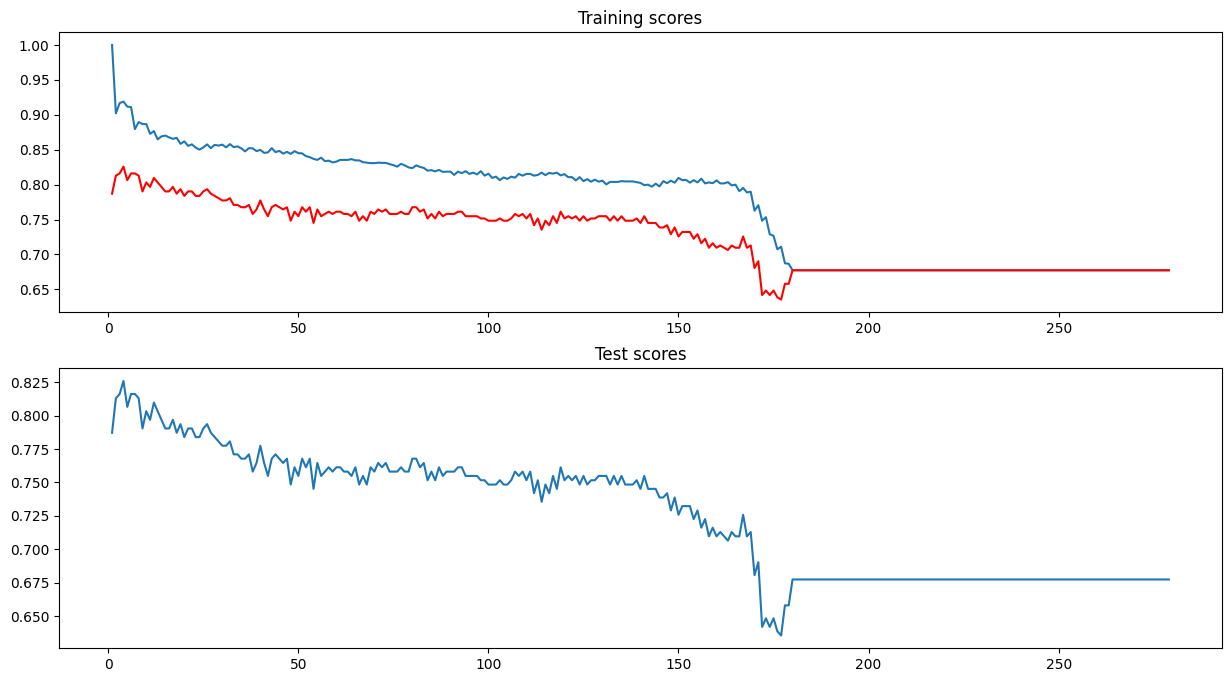

In [223]:
from sklearn.neighbors import KNeighborsClassifier
kNN = study_classifier(X,y,lambda n,**kwargs : KNeighborsClassifier(n_neighbors=n,**kwargs))

Vemos que, en general, cuanto mayor sea número de vecinos a considerar, peor es nuesta puntuación. Alrededor de $180$ y pasados los $200$ vecinos a considerar observamos que la precisión no mejora, y se queda estancada alrededor de $\frac{2}{3}$ de precisión. Esto se debe a que estamos considerando todos los datos del set de entrenamiento como vecinos de cualquier nodo, por lo que la respuesta del clasificador es constante. Esta será asignar `Abnormal` a cualquier nodo, pues ya hemos visto que hay el doble de nodos `Abnormal` frente a `Normal` en nuestros datos, por lo que la precisión de responder siempre la mayoría es de $\frac{2}{3}$

Escogemos el parámetro que minimice el error en los casos de prueba, es decir, que maximiza la precisión.

In [226]:
kNN_test_scores = np.array(list(map(lambda x : x[0], kNN.test_scores)))

In [227]:
idx = kNN_test_scores.argmax()
idx, kNN_test_scores[idx]

(3, 0.8258064516129032)

Por lo tanto, escogemos para el kNN el parámetro `n` = $3$

Probamos a reducir la dimensionalidad de los datos, quedándonos solo con las 5 variables con mayor correlación con las etiquetas finales. La motivación de este estudio es ver como una reducción de dimensión puede ayudar al algoritmo, pese a la perdida de información

  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be el

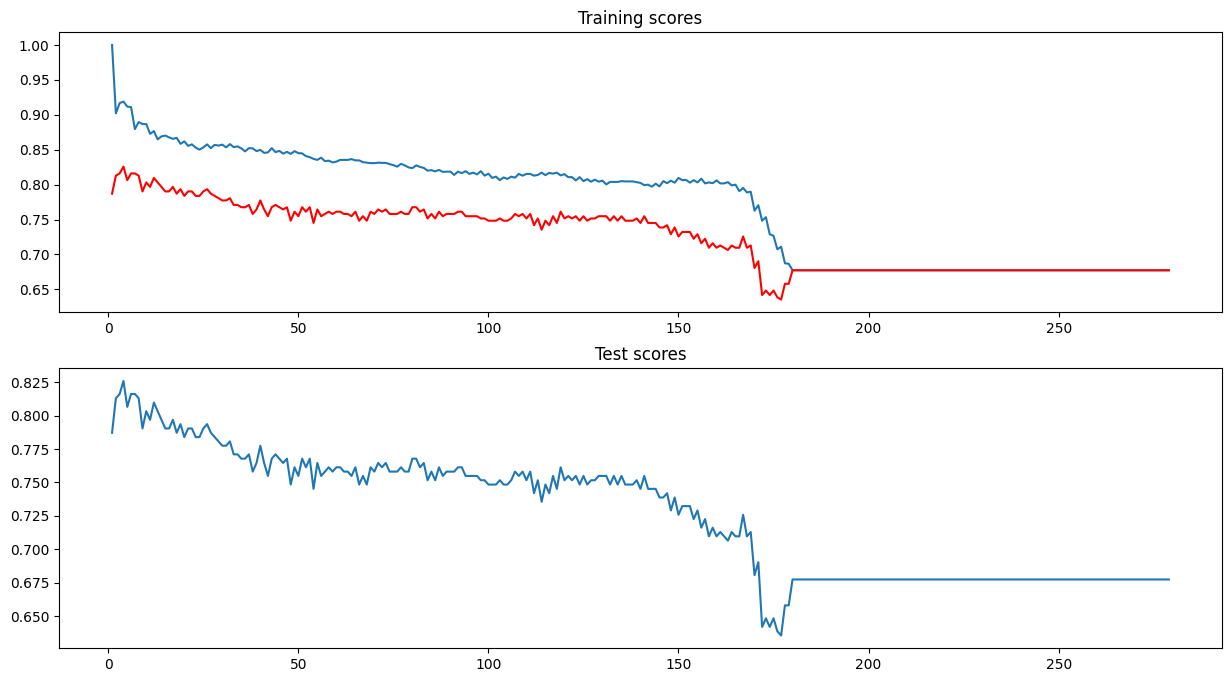

In [229]:
kNN_red = study_classifier(X[classes_most_correlated],y,lambda n,**kwargs : KNeighborsClassifier(n_neighbors=n,**kwargs))

In [232]:
kNN_red_test_scores = np.array(list(map(lambda x : x[0], kNN_red.test_scores)))
r_idx = kNN_red_test_scores.argmax()
(r_idx, kNN_red_test_scores[r_idx])

(3, 0.8258064516129032)

Como podemos observar, hemos reducido el tiempo de entrenamiento a la mitad, y aún así hemos conseguido la misma puntuación en el parámetro óptimo.

## 5) Resuelve el mismo problema usando un clasificador [MLP](https://en.wikipedia.org/wiki/My_Little_Pony:_Friendship_Is_Magic)

> Optimiza el coeficiente de regularización

Para obtener el mejor coeficiente de regularización, vamos a aplicar la **validación cruzada**. Probamos variar el coeficiente de regulación entre $[0.1, 2.1]$, incrementando cada vez $0.2$ para ver cómo va variando la precisión.

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import numpy as np

accuracy_mean = []
accuracy_std = []

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_validate(mlp, X, y, scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.8032258064516128,
 0.7967741935483871,
 0.8096774193548386,
 0.8032258064516128,
 0.8064516129032258,
 0.8,
 0.8096774193548388,
 0.8096774193548386,
 0.8064516129032258,
 0.8064516129032258]

Text(0, 0.5, 'Tasa de aciertos')

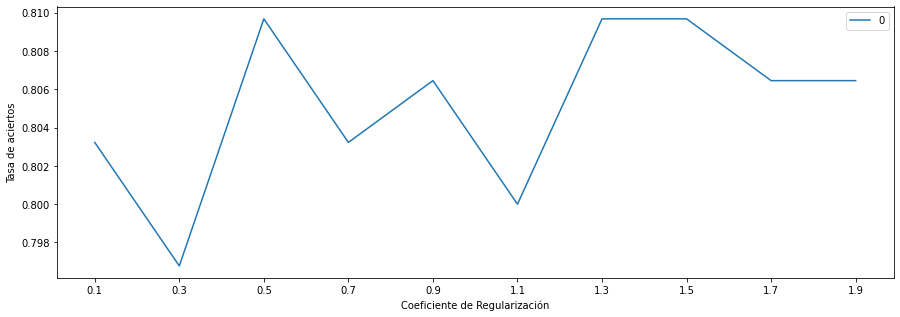

In [8]:
plt = pd.DataFrame(accuracy_mean, regul_param_range).plot(figsize=(15,5), xticks=regul_param_range)
plt.set_xlabel('Coeficiente de Regularización')
plt.set_ylabel('Tasa de aciertos')

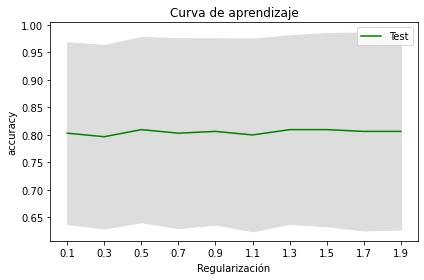

In [9]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.xticks(regul_param_range)
plt.show()

In [12]:
pd.DataFrame(accuracy_mean, regul_param_range)

,0
0.1,0.803226
0.3,0.796774
0.5,0.809677
0.7,0.803226
0.9,0.806452
1.1,0.800000
1.3,0.809677
1.5,0.809677
1.7,0.806452
1.9,0.806452


Se puede observar que, la máxima tasa del acierto se alcanza para el valor $1.3$, $0.5$, $1.5$. 

Vamos a obtener las métricas del MLP con $1.3$:

In [17]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.  
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=1.3, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, X, y, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test
scores

{'fit_time': array([0.27628636, 0.2804172 , 0.27300715, 0.29401517, 0.41865182,
        0.26778793, 0.27442265, 0.34739423, 0.27203107, 0.34255695]),
 'score_time': array([0.0056417 , 0.00563192, 0.00584555, 0.00652456, 0.00551534,
        0.00566411, 0.00559974, 0.0055027 , 0.0054965 , 0.00558209]),
 'test_precision_weighted': array([0.58172043, 0.61774194, 0.81370968, 0.76670507, 0.93548387,
        0.94109397, 0.94109397, 0.96920821, 0.8916129 , 0.94109397]),
 'test_recall_weighted': array([0.4516129 , 0.5483871 , 0.74193548, 0.77419355, 0.93548387,
        0.93548387, 0.93548387, 0.96774194, 0.87096774, 0.93548387]),
 'test_f1_weighted': array([0.4516129 , 0.56286187, 0.75020678, 0.76179633, 0.93548387,
        0.93336592, 0.93336592, 0.96726813, 0.86044881, 0.93336592])}

In [18]:
print('Precisión ponderada media: ', np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ', np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ', np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.83994640049058
Exhaustividad ponderada media:  0.8096774193548388
F1 ponderado media:  0.808977644979515


Comparando con la métrica obtenida utilizando como clasificador el árbol de decisión, podemos decir que el **rendimiento es bastante peor**. Antes alcanzábamos una precisión de 0.91, mientras que ahora sólo 0.83.